In [4]:
from skimage.io import imread, imshow
img2 = imread('/home/hussain/Desktop/image.png', as_gray=True)
img1 = imread('/home/hussain/Pictures/tactile2.png', as_gray=True)

img1.shape

(260, 346)

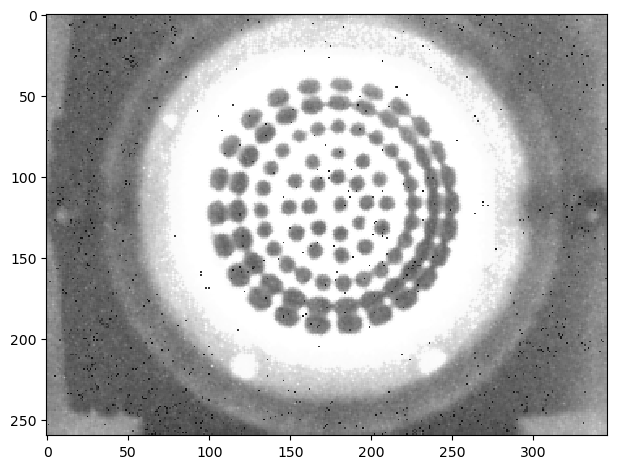

In [5]:
imshow(img2)

In [9]:
img2

array([[0.61250941, 0.61250941, 0.63046627, ..., 0.58258902, 0.66582941,
        0.66582941],
       [0.61250941, 0.61250941, 0.63046627, ..., 0.58258902, 0.66582941,
        0.66582941],
       [0.6324149 , 0.6324149 , 0.62957961, ..., 0.56494471, 0.60216627,
        0.60216627],
       ...,
       [0.58449294, 0.58449294, 0.61921451, ..., 0.70319569, 0.71296627,
        0.71296627],
       [0.57332431, 0.57332431, 0.57356157, ..., 0.68660863, 0.68209098,
        0.68209098],
       [0.57332431, 0.57332431, 0.57356157, ..., 0.68660863, 0.68209098,
        0.68209098]])

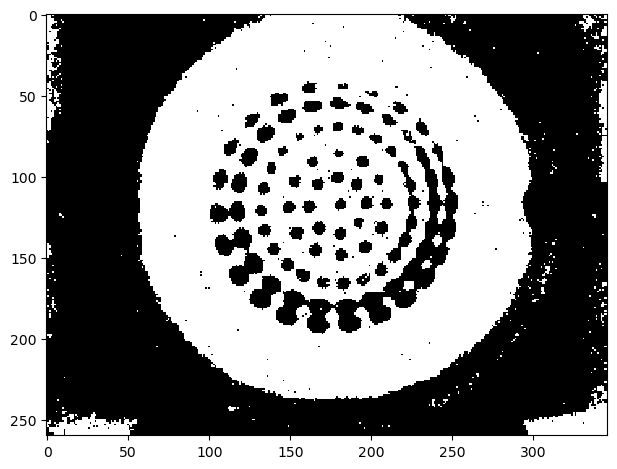

In [11]:
mask_thresh = img2 > 150/255
imshow(mask_thresh)

In [26]:
import cv2
import numpy as np
center = (180, 117)

def cropFrames(img, circle_center=center, circle_rad=100, im_height=260, im_width=346, im_channels=1):
    
    mask = np.zeros((im_height, im_width), dtype=np.float32)            
    cv2.circle(mask, circle_center, circle_rad, [1]*im_channels, -1, 8, 0)
    cropped_image = np.multiply(mask, img)

    return cropped_image

In [7]:
import h5py

h5py.File('../../markers_pixel_location.h5', 'r')['pixel_location'][:]

array([[0.00000000e+00, 0.00000000e+00, 1.82815323e+02, 1.66117111e+02],
       [0.00000000e+00, 0.00000000e+00, 1.70580002e+02, 1.65853333e+02],
       [0.00000000e+00, 0.00000000e+00, 1.95467743e+02, 1.63645157e+02],
       [0.00000000e+00, 0.00000000e+00, 1.58115387e+02, 1.61042740e+02],
       [0.00000000e+00, 0.00000000e+00, 2.06322754e+02, 1.57709000e+02],
       [0.00000000e+00, 0.00000000e+00, 1.48470322e+02, 1.54694061e+02],
       [0.00000000e+00, 0.00000000e+00, 1.81696976e+02, 1.48878784e+02],
       [0.00000000e+00, 0.00000000e+00, 2.14817459e+02, 1.48896820e+02],
       [0.00000000e+00, 0.00000000e+00, 1.65676468e+02, 1.46000000e+02],
       [0.00000000e+00, 0.00000000e+00, 1.39907410e+02, 1.45037033e+02],
       [0.00000000e+00, 0.00000000e+00, 1.96343582e+02, 1.43764099e+02],
       [0.00000000e+00, 0.00000000e+00, 2.21048889e+02, 1.39133331e+02],
       [0.00000000e+00, 0.00000000e+00, 1.81273804e+02, 1.35392853e+02],
       [0.00000000e+00, 0.00000000e+00, 1.54426468e

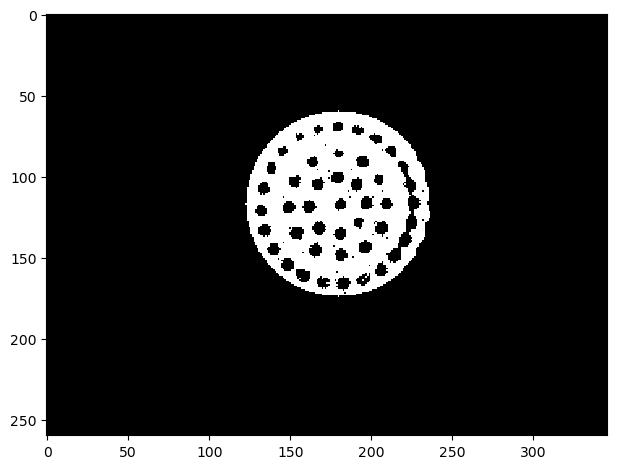

In [28]:
cropped = cropFrames(mask_thresh, circle_rad=57)
imshow(cropped)

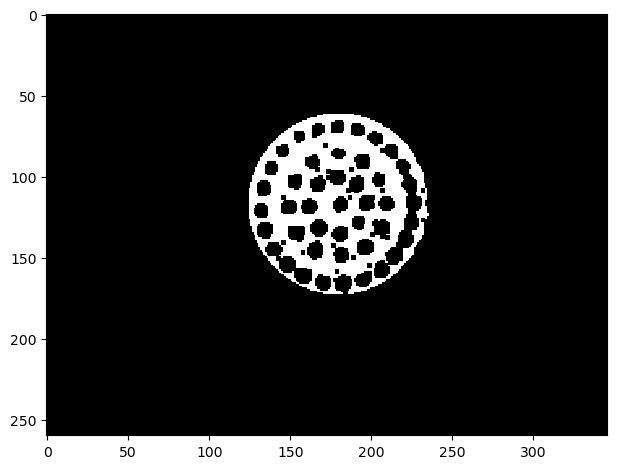

In [30]:
from skimage.morphology import binary_erosion, binary_closing, binary_opening
eroded = binary_erosion(cropped, np.ones((3, 3), np.uint8))
imshow(eroded)

In [8]:
eroded*1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
from skimage.morphology import label

labeled, num = label(1-eroded, return_num=True, connectivity=1, background=0)
num

54

In [10]:
from skimage.measure import label, regionprops, regionprops_table

centroids = regionprops_table(labeled, properties={'label', 'centroid'})
centroids

{'label': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54]),
 'centroid-0': array([133.7182609 ,  50.03448276,  54.47191011,  55.94736842,
         69.6       ,  69.58888889,  71.85714286,  72.40206186,
         73.45555556,  83.54961832,  85.32954545,  86.        ,
         90.13157895,  91.38823529,  92.90666667,  94.30337079,
         99.54117647, 101.37333333, 103.10810811, 103.04054054,
        103.7654321 , 108.98529412, 108.48076923, 120.04615385,
        120.29333333, 118.        , 120.41176471, 120.29310345,
        120.59090909, 122.        , 121.76404494, 121.3125    ,
        132.17808219, 132.2       , 138.25641026, 137.0625    ,
        137.94736842, 140.14492754, 141.07575758, 144.60869565,
        148.44444444, 151.08045977, 151.42307692, 157.70588235,
        156.46052632, 1

In [11]:
import pandas as pd

centroids_ = pd.DataFrame(centroids, columns=['centroid-0', 'centroid-1', 'label']).drop(0)
centroids_

,centroid-0,centroid-1,label
1,50.034483,153.551724,2
2,54.471910,180.449438,3
3,55.947368,126.750000,4
4,69.600000,153.566667,5
5,69.588889,202.411111,6
6,71.857143,104.857143,7
7,72.402062,173.041237,8
8,73.455556,134.400000,9
9,83.549618,190.618321,10
10,85.329545,118.568182,11


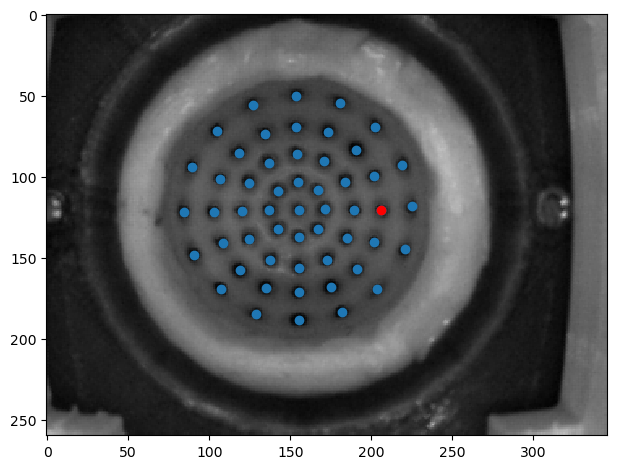

In [12]:
import matplotlib.pyplot as plt
imshow(img2)
plt.scatter(y=centroids_['centroid-0'], x=centroids_['centroid-1'])
odd = 28
plt.scatter(y=centroids_['centroid-0'][odd], x=centroids_['centroid-1'][odd], c='r')

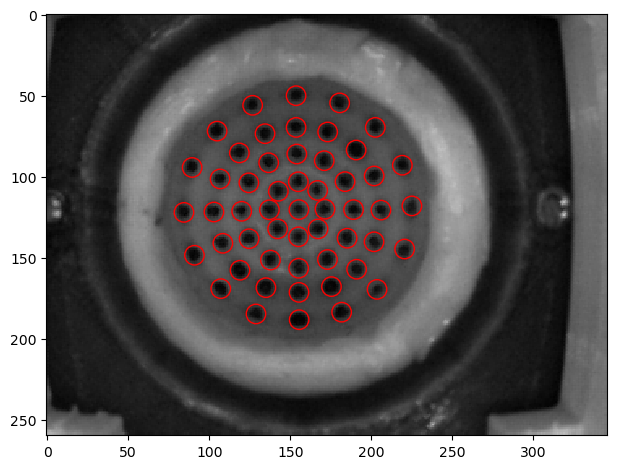

In [13]:
from skimage.draw import circle_perimeter
from matplotlib.patches import Polygon

imshow(img2)

for c1, c2 in zip(centroids_['centroid-1'], centroids_['centroid-0']):
    #rr, cc = circle_perimeter(int(c1), int(c2), 5)
    circle1 = plt.Circle((c1, c2), 6, color='r', fill=False)
    plt.gca().add_patch(circle1)
    

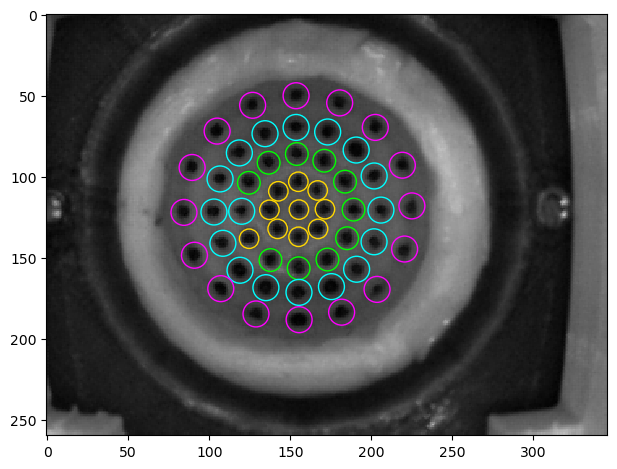

In [14]:
img2 = imread('/home/hussain/Pictures/tactile2.png', as_gray=True)
imshow(img2)
radii = []
for c1, c2 in zip(centroids_['centroid-1'], centroids_['centroid-0']):
    r = np.sqrt((c2- center[1])**2 + (c1 - center[0])**2)
    radii.append(r)
    #rr, cc = circle_perimeter(int(c1), int(c2), 5)
    if r <= 1.5:
        radius = 5
        c='red'
    elif (r > 15) and (r <= 23):
        radius = 6
        c='gold'
    elif (r > 29) and (r <= 37):
        radius = 7
        c='lime'
    elif (r > 43) and (r <= 57):
        radius = 8
        c = 'aqua'
    elif r > 62:
        radius = 8
        c = 'magenta'
        
    circle1 = plt.Circle((c1, c2), radius, color=c, fill=False)
    plt.gca().add_patch(circle1)
    
    

(array([ 1.,  4.,  4.,  1., 11.,  0.,  9.,  7.,  1., 15.]),
 array([ 2.79767612,  9.87930204, 16.96092797, 24.04255389, 31.12417982,
        38.20580574, 45.28743167, 52.36905759, 59.45068351, 66.53230944,
        73.61393536]),
 <BarContainer object of 10 artists>)

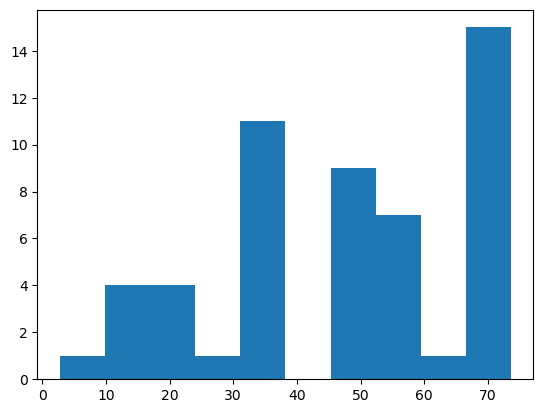

In [15]:
plt.hist(radii, bins=10)

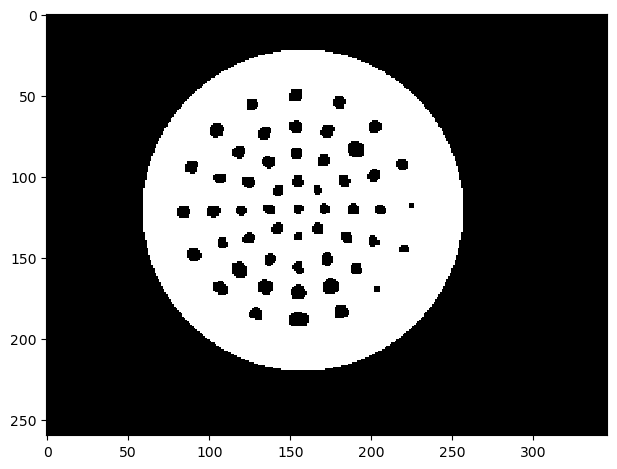

In [16]:
def img2mask(img):
    mask_thresh = img > 20/255
    cropped = cropFrames(mask_thresh)
    eroded = binary_erosion(cropped, np.ones((3, 3), np.uint8))
    
    return eroded

imshow(img2mask(img2))

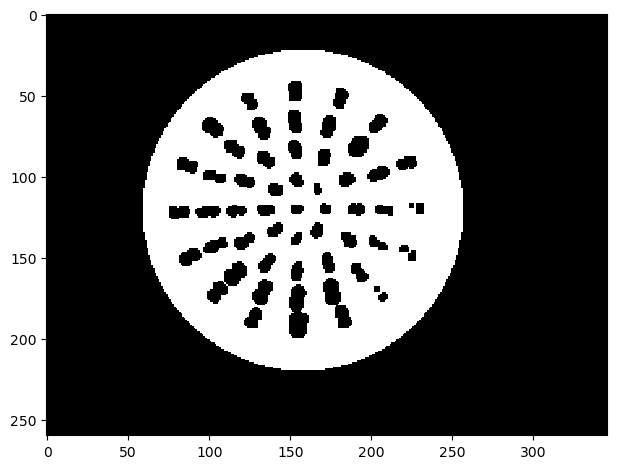

In [17]:
imshow(np.bitwise_and(img2mask(img1), img2mask(img2)))

In [18]:
centroids_.values

array([[ 50.03448276, 153.55172414,   2.        ],
       [ 54.47191011, 180.4494382 ,   3.        ],
       [ 55.94736842, 126.75      ,   4.        ],
       [ 69.6       , 153.56666667,   5.        ],
       [ 69.58888889, 202.41111111,   6.        ],
       [ 71.85714286, 104.85714286,   7.        ],
       [ 72.40206186, 173.04123711,   8.        ],
       [ 73.45555556, 134.4       ,   9.        ],
       [ 83.54961832, 190.61832061,  10.        ],
       [ 85.32954545, 118.56818182,  11.        ],
       [ 86.        , 154.        ,  12.        ],
       [ 90.13157895, 170.94736842,  13.        ],
       [ 91.38823529, 136.64705882,  14.        ],
       [ 92.90666667, 219.09333333,  15.        ],
       [ 94.30337079,  89.42696629,  16.        ],
       [ 99.54117647, 201.71764706,  17.        ],
       [101.37333333, 106.66666667,  18.        ],
       [103.10810811, 154.94594595,  19.        ],
       [103.04054054, 183.75675676,  20.        ],
       [103.7654321 , 124.41975

In [19]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vd = Voronoi(centroids_.values[:, :2][:, ::-1])

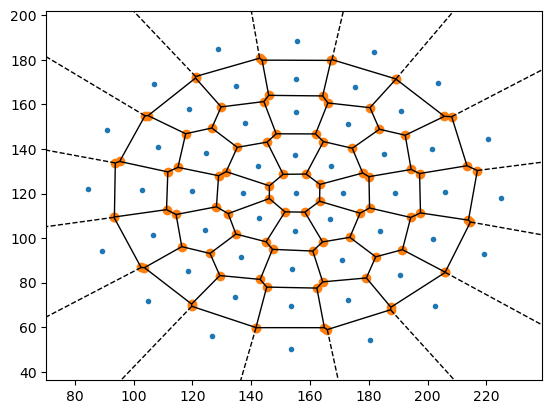

In [20]:
voronoi_plot_2d(vd);


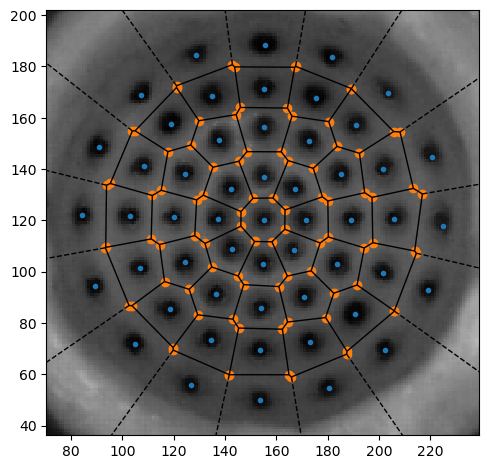

In [21]:
voronoi_plot_2d(vd)
imshow(img2)

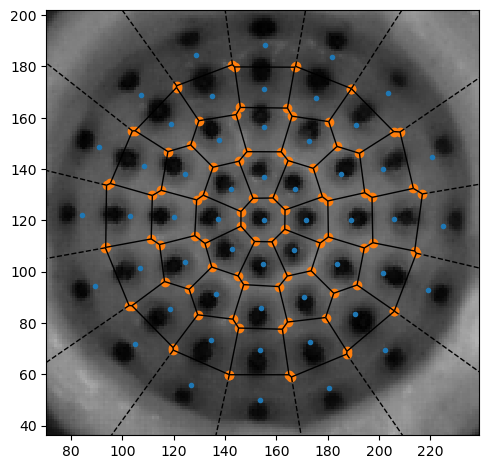

In [22]:
voronoi_plot_2d(vd)
imshow(img1)

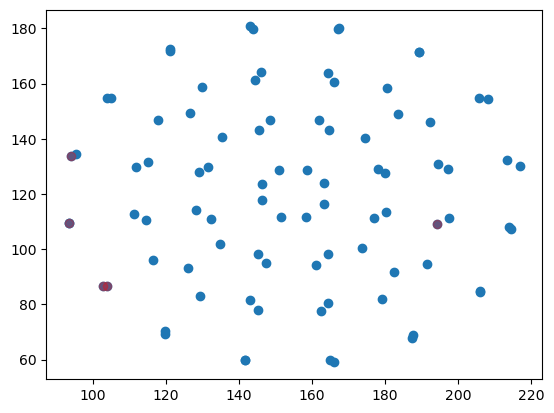

In [23]:
plt.scatter(*vd.vertices.T)
plt.scatter(*vd.vertices[[9, 5, 7, 6, 8], :].T, c='r', alpha=0.3)

In [24]:
from imports.ExtractContactCases import ExtractContactCases

ex = ExtractContactCases('contact_extraction1')
samples = ex.load()

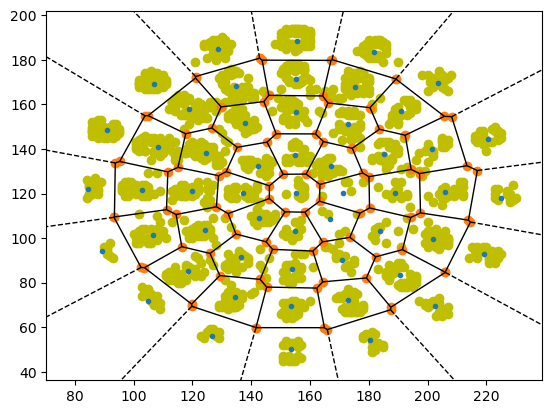

In [25]:
sample = np.array(samples['sample_1']['events'])
case = samples['sample_1']['case']
plt.scatter(*sample[:, :2].T, c='y')
voronoi_plot_2d(vd, ax=plt.gca());


In [26]:
case

1

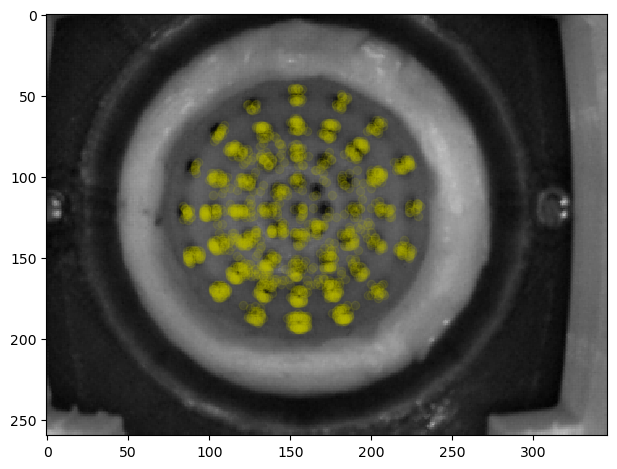

In [27]:
imshow(img2)
plt.scatter(*sample[:, :2].T, c='y', alpha=0.1)


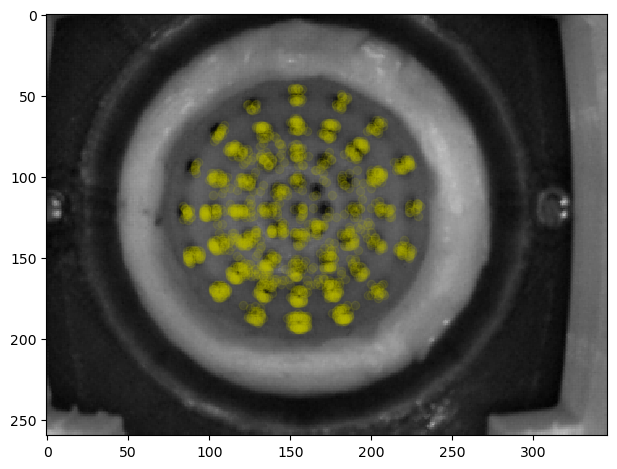

In [28]:
imshow(img2)
plt.scatter(*sample[:, :2].T, c='y', alpha=0.1)


In [63]:
centroids_.to_csv('centroids.csv', index=False)

In [29]:
cents = centroids_.values[:, :2][:, ::-1]

In [30]:
from scipy.spatial.distance import cdist
X = sample[:, :2]
d = cdist(X, cents)

In [31]:
node = np.argmin(d, axis=-1)

In [32]:
np.unique(node)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52])

#### node features
1. n_events
2. n pos events
3. n negative events
4. r for pos/neg events
5. theta
6. mean polarity

In [33]:
center

(158, 121)

In [34]:
from imports.TactileDataset import cases_dict


In [35]:
from torch_geometric.data import Data
from torch_geometric.nn.pool import radius_graph, knn_graph
from torch_geometric.utils import to_undirected
import torch

pos = torch.from_numpy(cents.copy())
event_node_idx = np.argmin(d, axis=-1)
center_ = np.array(center)[::-1]

node_features = torch.zeros((53, 5))
for node_idx in range(len(pos)):
    events_idx = event_node_idx == node_idx
    pos_events_idx = sample[events_idx, 3] == 1

    n_events = sum(events_idx) #1
    
    n_pos_events = sum(pos_events_idx) #2
    n_neg_events = n_events - n_pos_events #3
    
    r = np.linalg.norm(sample[events_idx, :2] - center, axis=-1) 
    delta_r = r.max() - r.min() #4
    
    theta = np.arctan2(cents[node_idx][1] - center[1], cents[node_idx][0] - center[0]) #5
    
    node_features[node_idx, 0] = n_events
    node_features[node_idx, 1] = n_pos_events
    node_features[node_idx, 2] = n_neg_events
    node_features[node_idx, 3] = delta_r
    node_features[node_idx, 4] = theta
    
edge_index = knn_graph(pos, 5)
edge_index = to_undirected(edge_index)
y = torch.tensor(np.array(cases_dict[case], dtype=np.float32)).reshape(1, -1).reshape(1, -1)
data = Data(x=node_features, edge_index=edge_index, pos=pos, y=y)
data

Data(x=[53, 5], edge_index=[2, 312], y=[1, 2], pos=[53, 2])

In [36]:
from torch_geometric.utils import to_networkx
import networkx as nx

nx_g = to_networkx(data)

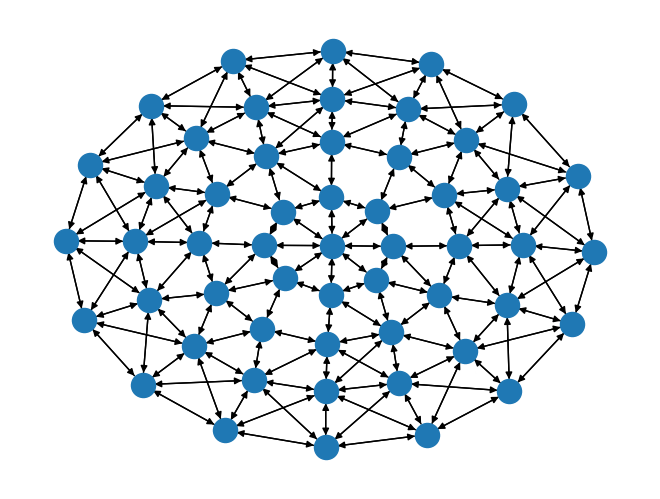

In [37]:
nx.draw(nx_g, {i: pos[i, :].numpy() for i in range(53)})

In [38]:
from sklearn.model_selection import train_test_split
from torch_geometric import seed_everything
seed_everything(0)

sample_idx = list(samples.keys())
cases = [str(samples[s_idx]['case']) for s_idx in sample_idx]

train_idx, val_test_idx = train_test_split(sample_idx, test_size=1-0.8, random_state=0) #fixed across extractions

cases = [str(samples[s_idx]['case']) for s_idx in val_test_idx]
val_idx, test_idx = train_test_split(val_test_idx,  test_size=0.5, random_state=0) #fixed across extractions

In [39]:
def process_sample(sample, case):
    pos = torch.from_numpy(cents.copy())

    X = sample[:, :2]
    d = cdist(X, cents)

    event_node_idx = np.argmin(d, axis=-1)
    center = (120.537313, 153.835821)
    center = np.array(center)

    node_features = torch.zeros((53, 5))
    for node_idx in range(len(pos)):
        events_idx = event_node_idx == node_idx
        pos_events_idx = sample[events_idx, 3] == 1

        n_events = sum(events_idx) #1

        n_pos_events = sum(pos_events_idx) #2
        n_neg_events = n_events - n_pos_events #3

        r = np.linalg.norm(sample[events_idx, :2] - center, axis=-1) 
        delta_r = r.max() - r.min() if len(r) > 0 else 0 #4

        theta = np.arctan2(cents[node_idx][1] - center[1], cents[node_idx][0] - center[0]) #5

        node_features[node_idx, 0] = n_events
        node_features[node_idx, 1] = n_pos_events
        node_features[node_idx, 2] = n_neg_events
        node_features[node_idx, 3] = delta_r
        node_features[node_idx, 4] = theta

    edge_index = knn_graph(pos, 5)
    edge_index = to_undirected(edge_index)
    y = torch.tensor(np.array(cases_dict[case], dtype=np.float32)).reshape(1, -1).reshape(1, -1)
    data = Data(x=node_features, edge_index=edge_index, pos=pos, y=y)
    
    return data

In [40]:
pos.shape

torch.Size([53, 2])

In [57]:
def train_gen():
    for sample_idx in train_idx:
        sample = np.array(samples[sample_idx]['events'])
        case = samples[sample_idx]['case']
        data = process_sample(sample, case)
        yield data
        
def val_gen():
    for sample_idx in val_idx:
        sample = np.array(samples[sample_idx]['events'])
        case = samples[sample_idx]['case']
        data = process_sample(sample, case)
        yield data
        


In [58]:
from torch_geometric.nn import GCNConv,SplineConv,BatchNorm

class gcn(torch.nn.Module):
    
    def __init__(self):
        super(gcn, self).__init__()
        self.conv1 = GCNConv(5, 32)
        self.bn1 = BatchNorm(32)
        self.conv2 = GCNConv(32, 64)
        self.bn2 = BatchNorm(64)
        self.conv3 = GCNConv(64, 128)
        self.bn3 = BatchNorm(128)

        
        self.fc1 = torch.nn.Linear(53 * 128, 1024)
        self.fc2 = torch.nn.Linear(1024, 256)
        self.fc3 = torch.nn.Linear(256, 2)
    
    def forward(self,data):
        data.x = self.conv1(data.x, data.edge_index)
        data.x = torch.nn.functional.relu(data.x)
        data.x = self.bn1(data.x)
        
        data.x = self.conv2(data.x, data.edge_index)
        data.x = torch.nn.functional.relu(data.x)
        data.x = self.bn2(data.x)
        
        data.x = self.conv3(data.x, data.edge_index)
        data.x = torch.nn.functional.relu(data.x)
        data.x = self.bn3(data.x)
        
        out = self.fc1(data.x.view(-1, self.fc1.weight.size(1)))
        out = torch.nn.functional.relu(out)
        out = torch.nn.functional.dropout(out, training=self.training)
        
        out = self.fc2(out)
        out = torch.nn.functional.relu(out)
        out = torch.nn.functional.dropout(out, training=self.training)
        
        out = self.fc3(out)
        return out


In [59]:
model = gcn().cuda()


In [60]:
loss_func = torch.nn.L1Loss()
n_epochs = 150
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', min_lr=1e-5, patience=10)

In [61]:
loss_func = torch.nn.L1Loss()
n_epochs = 150
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', min_lr=1e-5, patience=10)
def validate():
    loss = 0
    for i, data in enumerate(val_gen()):      
        data = data.to('cuda')
        end_point = model(data)

        loss += loss_func(end_point, data.y).detach().item()
    loss /= len(val_idx)
    return loss

In [1]:
from tqdm.auto import trange, tqdm
train_losses = []
val_losses = []
lrs = []



for epoch in trange(n_epochs, desc='training', unit='epoch'):
    #bunny(epoch)
    epoch_loss = 0
    lr = optimizer.param_groups[0]['lr']
    lrs.append(lr)
    val_loss = torch.inf
    with tqdm(train_gen(), unit="batch", total=len(train_idx)) as tepoch:
        for i, data in enumerate(tepoch):
            tepoch.set_description(f"Epoch {epoch}")
            with torch.autograd.detect_anomaly():
                data = data.to('cuda')
                optimizer.zero_grad()
                end_point = model(data)
                loss = loss_func(end_point, data.y)
                loss.backward()
                optimizer.step()
                lr = optimizer.param_groups[0]['lr']

                epoch_loss += loss.detach().item()

                tepoch.set_postfix({
                    'train_loss': epoch_loss / (i + 1), 
                    'train_loss_degrees': epoch_loss / (i + 1) * 180/np.pi, 
                    'val_loss': val_losses[epoch - 1] if epoch > 0 else 'na',
                    'val_loss_degrees': val_losses[epoch - 1] * 180/np.pi if epoch > 0 else 'na',
                    'lr': lr
                    })

        scheduler.step(val_loss)
        epoch_loss /= len(train_idx)
        val_loss = validate()
        tepoch.set_postfix({'train_loss': epoch_loss, 'val_loss': val_loss})
        train_losses.append(epoch_loss)
        val_losses.append(val_loss)
        


NameError: name 'n_epochs' is not defined

In [ ]:
sample = np.array(samples['sample_1']['events'])
plt.scatter(*sample[events_idx, :2].T, c='y')
voronoi_plot_2d(vd, ax=plt.gca());
plt.scatter(*cents[node_idx], c='r')